#                                   Python Exam Part 2

## Description
This notebook is used to answer questions of a pratical Python Exam. In this notebook, we read a csv file to create a Pandas DataFrame, and analyse the data of the DataFrame to answer different questions based on analysis performed.

The exam, crafted by ExploreAI Academy, was designed to assess the proficiency of us learners in data wrangling and performing data analysis using Python. Additionally, it aimed to evaluate our overall understanding of Python coding, particularly following the completion of the Python module lessons.




## Exam Resources
- A `MD_agric_exam.csv` file is provided. On the data in the file, we perform our analysis.

### Number of questions: 12

## Import necessary packages
Firstly, we import necessary packages that like Pandas for loading the DataFrame and performing analysis on it, Numpy package will also be needed to perform basic numeric operations on numerical data.

In [2]:
import pandas as pd  #import the pandas package in our environment
import numpy as np  #import the numpy package in our environment

## Read the CSV file into Pandas
Before performing any analysis, we read in our data into our environment as a Pandas DataFrame.

In [7]:
file_path = "MD_agric_exam-4313.csv"
df = pd.read_csv(file_path)
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


## Questions

## Question 1

Write code to determine the number of unique crop types in the dataset?

In [11]:
#Answer to the above question
arr = df['Crop_type'].unique() #to get an array of unique data in the Crop_type column
len(arr)

8

## Question 2
Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

## Answer
To answer the question, filter the DataFrame to include data where the crop type is 'wheat', then use the max() method to find the maximum value of the Annual_yield column and round the result to 2dp.

In [62]:
#Answer to the above question
filtered_crop_df = df[df['Crop_type'] == "wheat"]
round(filtered_crop_df['Annual_yield'].max(), 2)

8.99

## Question 3
Find the total rainfall for crop types where the average pollution level is above 0.2.

## Answer
### Steps to final answer
- First group the DataFrame df by the unique crop types and aggregate by the mean of the pollution level to return the average pollution level of each crop.
- We create a list (crops) of crops where the average pollution level is above 0.2 as realised from the grouped data.
- Use the list to filter the DataFrame df to exclude crop types that have their average pollution level below 0.2 (only includes the crop types in the 'crops' list) and find the sum of its 'Rainfall' column.

In [33]:
#Answer to the above question
grouped_df = df.groupby(['Crop_type'])[['Pollution_level']].mean()
grouped_df

,Pollution_level
Crop_type,
banana,0.093806
cassava,0.327714
coffee,0.220615
maize,0.265101
potato,0.252135
rice,0.065531
tea,0.214799
wheat,0.223527


In [34]:
crops = ['cassava', 'coffee', 'maize', 'potato', 'tea', 'wheat'] #crops where average polluyion level is above 0.2
filter_df = df.query('Crop_type in @crops')
filter_df['Rainfall'].sum()

941959.7

## Question 4
Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [54]:
#Answer to the question above
def calc_temp_range(df, *field_ID):
    """
    calculates the temperature range of a field given the field ID

    Arguments:
        df: A dataframe with several columns.
        Field_ID(int): A number assigned to a field as unique identifier

    Returns:
        range(series): Difference of the maximum temperature and minimum temperature of a field.
    """
    filter_df = df[df['Field_ID'].isin(field_ID)]
    range = filter_df['Max_temperature_C'] - filter_df['Min_temperature_C']
    return range


calc_temp_range(df, 1458, 1895, 5443)


135    40.7
644    35.7
892    33.4
dtype: float64

## Question 5
What does the following code achieve?

a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

## Answer
### Code analysis as follows
a = data['Crop_type'].unique(): This line retrieves unique crop types from the 'Crop_type' column of the dataset and stores them in the variable a.

b = float('inf'): This line initializes a variable b with a value of positive infinity. This value will be used to store the minimum mean temperature found so far.

c = '': This line initializes an empty string variable c, which will be used to store the crop type with the lowest mean minimum temperature.

The for loop iterates over each unique crop type in a.

Inside the loop:

d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean(): This line calculates the mean minimum temperature (Min_temperature_C) for the current crop type (crop).
if d < b:: This condition checks if the mean minimum temperature (d) is less than the current minimum temperature (b).
If it is, then:
b = d: Update the minimum temperature to d.
c = crop: Update the crop type (c) to the current crop type (crop).
After the loop completes, c will hold the crop type with the lowest mean minimum temperature found in the dataset.

Finally, print(c) prints the crop type with the lowest mean minimum temperature e from the dataset.

### Let's run the code to verify

In [57]:
a = df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

rice


According to the result of the code, we verify the funtionality of the given code as it is designed to find the crop type with the lowest mean minimum temperature (Min_temperature_C) from a dataset (df)of which in our case is `rice` 

## Question 6
Write code to calculate the total plot size for plots where the pH is less than 5.5.

## Answer
To answer the question, filter the DataFrame to include data where the pH is less than 5.5, then use the sum() method to find the total plot size of fields in the filtered data.

In [61]:
filtered_pH_df = df[df['pH'] < 5.5]
filtered_pH_df['Plot_size'].sum()

1731.8999999999999

## Question 7
Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

## Answer

In [67]:
#Answer to the question above
filtered_df = df[(df['Min_temperature_C'] < -5) &(df['Max_temperature_C'] > 30)]
filtered_df.shape

(319, 10)

## Question 8
Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

In [76]:
#Answer to the question above
median = df['Plot_size'].median()
filter_median_df = df[df['Plot_size'] > median]
np.std(filter_median_df['Rainfall'])

469.6199685856172

## Question 9
If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

## Answer
### Steps to final answer
- First group the DataFrame df by the 'Max_temperature_C' column and aggregate the result by count(), then sort the resulting dataframe in descending order.
- Also group the DataFrame df by the 'Crop_type' column and aggregate the result by count(), then sort the resulting dataframe in ascending order.
- Define a function `join_strings` that accepts two dataframes and concatenate the first three elements of the name of the first index of the first dataframe and last three elements of the name of the first index of the second dataframe.
- Lastly, call the function and pass in the previously created grouped dataframes.

### Create the first grouped dataframe `grouped_temp`

In [84]:
#Answer to the above question
grouped_temp = df.groupby('Max_temperature_C').count() #group df by 'Max_temperature_C' column
grouped_temp = grouped_temp.sort_values(by='Field_ID', ascending=False)
grouped_temp

,Field_ID,Elevation,Rainfall,Min_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
Max_temperature_C,,,,,,,,,
30.7,26,26,26,26,26,26,26,26,26
31.0,25,25,25,25,25,25,25,25,25
30.5,24,24,24,24,24,24,24,24,24
31.5,23,23,23,23,23,23,23,23,23
30.6,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...
25.9,1,1,1,1,1,1,1,1,1
26.5,1,1,1,1,1,1,1,1,1
26.4,1,1,1,1,1,1,1,1,1


### Create the second grouped dataframe `grouped_crop`

In [96]:
grouped_crop = df.groupby('Crop_type').count()  #group df by 'Crop_type' column
grouped_crop = grouped_crop.sort_values(by='Field_ID')  #sort in ascending order
grouped_crop

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
Crop_type,,,,,,,,,
rice,48,48,48,48,48,48,48,48,48
maize,82,82,82,82,82,82,82,82,82
coffee,99,99,99,99,99,99,99,99,99
banana,103,103,103,103,103,103,103,103,103
tea,137,137,137,137,137,137,137,137,137
cassava,141,141,141,141,141,141,141,141,141
potato,146,146,146,146,146,146,146,146,146
wheat,244,244,244,244,244,244,244,244,244


### Create the function to return the final result

In [99]:
def join_strings(first_df, second_df): 
    """
    Accepts two dataframes and concatenate the first three elements of the name of the first index of the first dataframe 
    and last three elements of the name of the first index of the second dataframe.

    Attributes: 
        first_df(df): A Pandas DataFrame
        second_df(df): A Pandas DataFrame
    Returns:
        joint_str(str): concatenated string of the first three elements of the name of the first index of the first dataframe 
        and last three elements of the name of the first index of the second dataframe.
    """
    str_temp = str(first_df.index[0])
    str_crop = str(second_df.index[0])
    joint_str = str_temp[ :3] + str_crop[-3: ]
    return joint_str

join_strings(grouped_temp, grouped_crop)

'30.ice'

## Question 10
Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

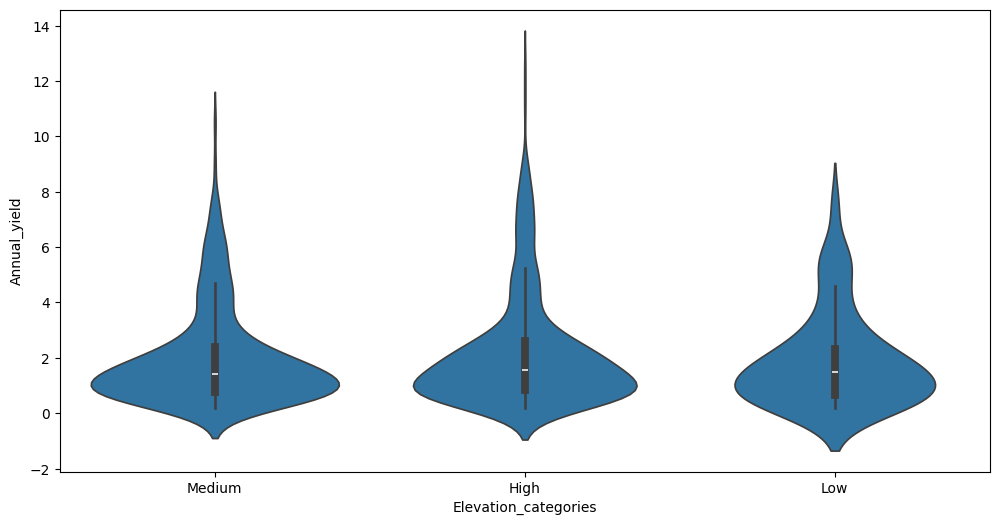

In [125]:
#Answer to the question above
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Annual_yield' and 'Elevation' columns

# Define elevation categories
def elevation_level(df):
    if df['Elevation'] < 300:
        return 'Low'
    elif df['Elevation'] >= 300 and df['Elevation'] <= 600:
        return "Medium"
    else:
        return "High"
df['Elevation_categories'] = df.apply(elevation_level, axis=1)

plt.figure(figsize=(12,6))

sns.violinplot(data=df, x='Elevation_categories', y='Annual_yield')
plt.show()

### Observation from the Violin Plot

From the Violin plot above, we observe that; The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. This could indicate that lower elevations provide stable conditions for consistent agricultural output.

## Question 11
Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [127]:
#Answer to the question above
def sum_crop_values(data, unique_crops=None):
    """
    Sums the integer values for each unique crop type in a dataset. The function recursively calls itself.
    
    Attributes:
        data: A Pandas DataFrame.
        Unique_crops(set): A set to include all unique crop types in the dataset, initially set to None.
        
    Returns:
        total_sum(int): Total sum of integer values contributed by each unique crop type
        """
    # Initialize the sum
    total_sum = 0
    
    # Initialize unique_crops if it's None
    if unique_crops is None:
        unique_crops = set(data['Crop_type'])
    
    # Base case: If there are no more unique crop types, return 0
    if len(unique_crops) == 0:
        return 0
    
    # Get the first crop type from the set of unique crop types
    crop_type = unique_crops.pop()
    
    # Calculate the contribution of the crop type and add it to the total sum
    crop_contribution = len(crop_type)
    total_sum += crop_contribution
    
    # Recursively call the function with the remaining unique crop types
    total_sum += sum_crop_values(data, unique_crops)
    
    return total_sum

# Example usage:
# Assuming data is your DataFrame containing the 'Crop_type' column
total_sum = sum_crop_values(df)
print("Total sum of integer values contributed by each unique crop type:", total_sum)


Total sum of integer values contributed by each unique crop type: 42


## Question 12
Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [128]:
from scipy import stats

# Assuming df is your DataFrame containing 'Annual_yield' and 'Crop_type' columns

# Filter the DataFrame for 'coffee' and 'banana' crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(coffee_yield, banana_yield)

# Round the p-value to three decimal places
rounded_p_value = round(p_value, 3)

print("P-value:", rounded_p_value)


P-value: 0.598


## Summary
This script was used to answer questions of a Python Exam that requires writing and running Python codes, included are the questions followed by the Python codes used in answering them. Below is the details of the exam's result after submission.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/young-haywhy/PythonExam/blob/main/Exam%20Result%20(Image).png"  style="width:200px";/>
</div>
